In [1]:
#导入所需要的库
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# 设置中文字体以防止乱码
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False  # 显示负号
from scipy import stats
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA
from scipy.stats import spearmanr
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
data=pd.read_csv("D:\dailydocs\BD and Business Analysis\mcdonalds.csv",encoding="utf-8")

In [2]:
#一、Data Preview
#查看数据维度
data.shape
#查看数据信息
data.info()
# 查看各列缺失值
data.isna().sum()
# 查看重复值
data.duplicated().sum()
#将数据非数值型数据赋值为数值型，便于后续分析
print('"Like"特征的唯一值：')
print(data['Like'].unique())
print('-'*50)
print('"VisitFrequency"特征的唯一值：')
print(data['VisitFrequency'].unique())
like_mapping = {
    'I love it!+5': 5,
    '+4': 4,
    '+3': 3,
    '+2': 2,
    '+1': 1,
    '0': 0,
    '-1': -1,
    '-2': -2,
    '-3': -3,
    '-4': -4,
    'I hate it!-5': -5
}

data['Like'] = data['Like'].map(like_mapping)
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Index           1453 non-null   int64 
 1   yummy           1453 non-null   object
 2   convenient      1453 non-null   object
 3   spicy           1453 non-null   object
 4   fattening       1453 non-null   object
 5   greasy          1453 non-null   object
 6   fast            1453 non-null   object
 7   cheap           1453 non-null   object
 8   tasty           1453 non-null   object
 9   expensive       1453 non-null   object
 10  healthy         1453 non-null   object
 11  disgusting      1453 non-null   object
 12  Like            1453 non-null   object
 13  Age             1453 non-null   int64 
 14  VisitFrequency  1453 non-null   object
 15  Gender          1453 non-null   object
dtypes: int64(2), object(14)
memory usage: 181.8+ KB
"Like"特征的唯一值：
['-3' '+2' '+1' '+4' 'I love it!+5

,Index,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,1,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,2,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,3,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female
3,4,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female
4,5,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male


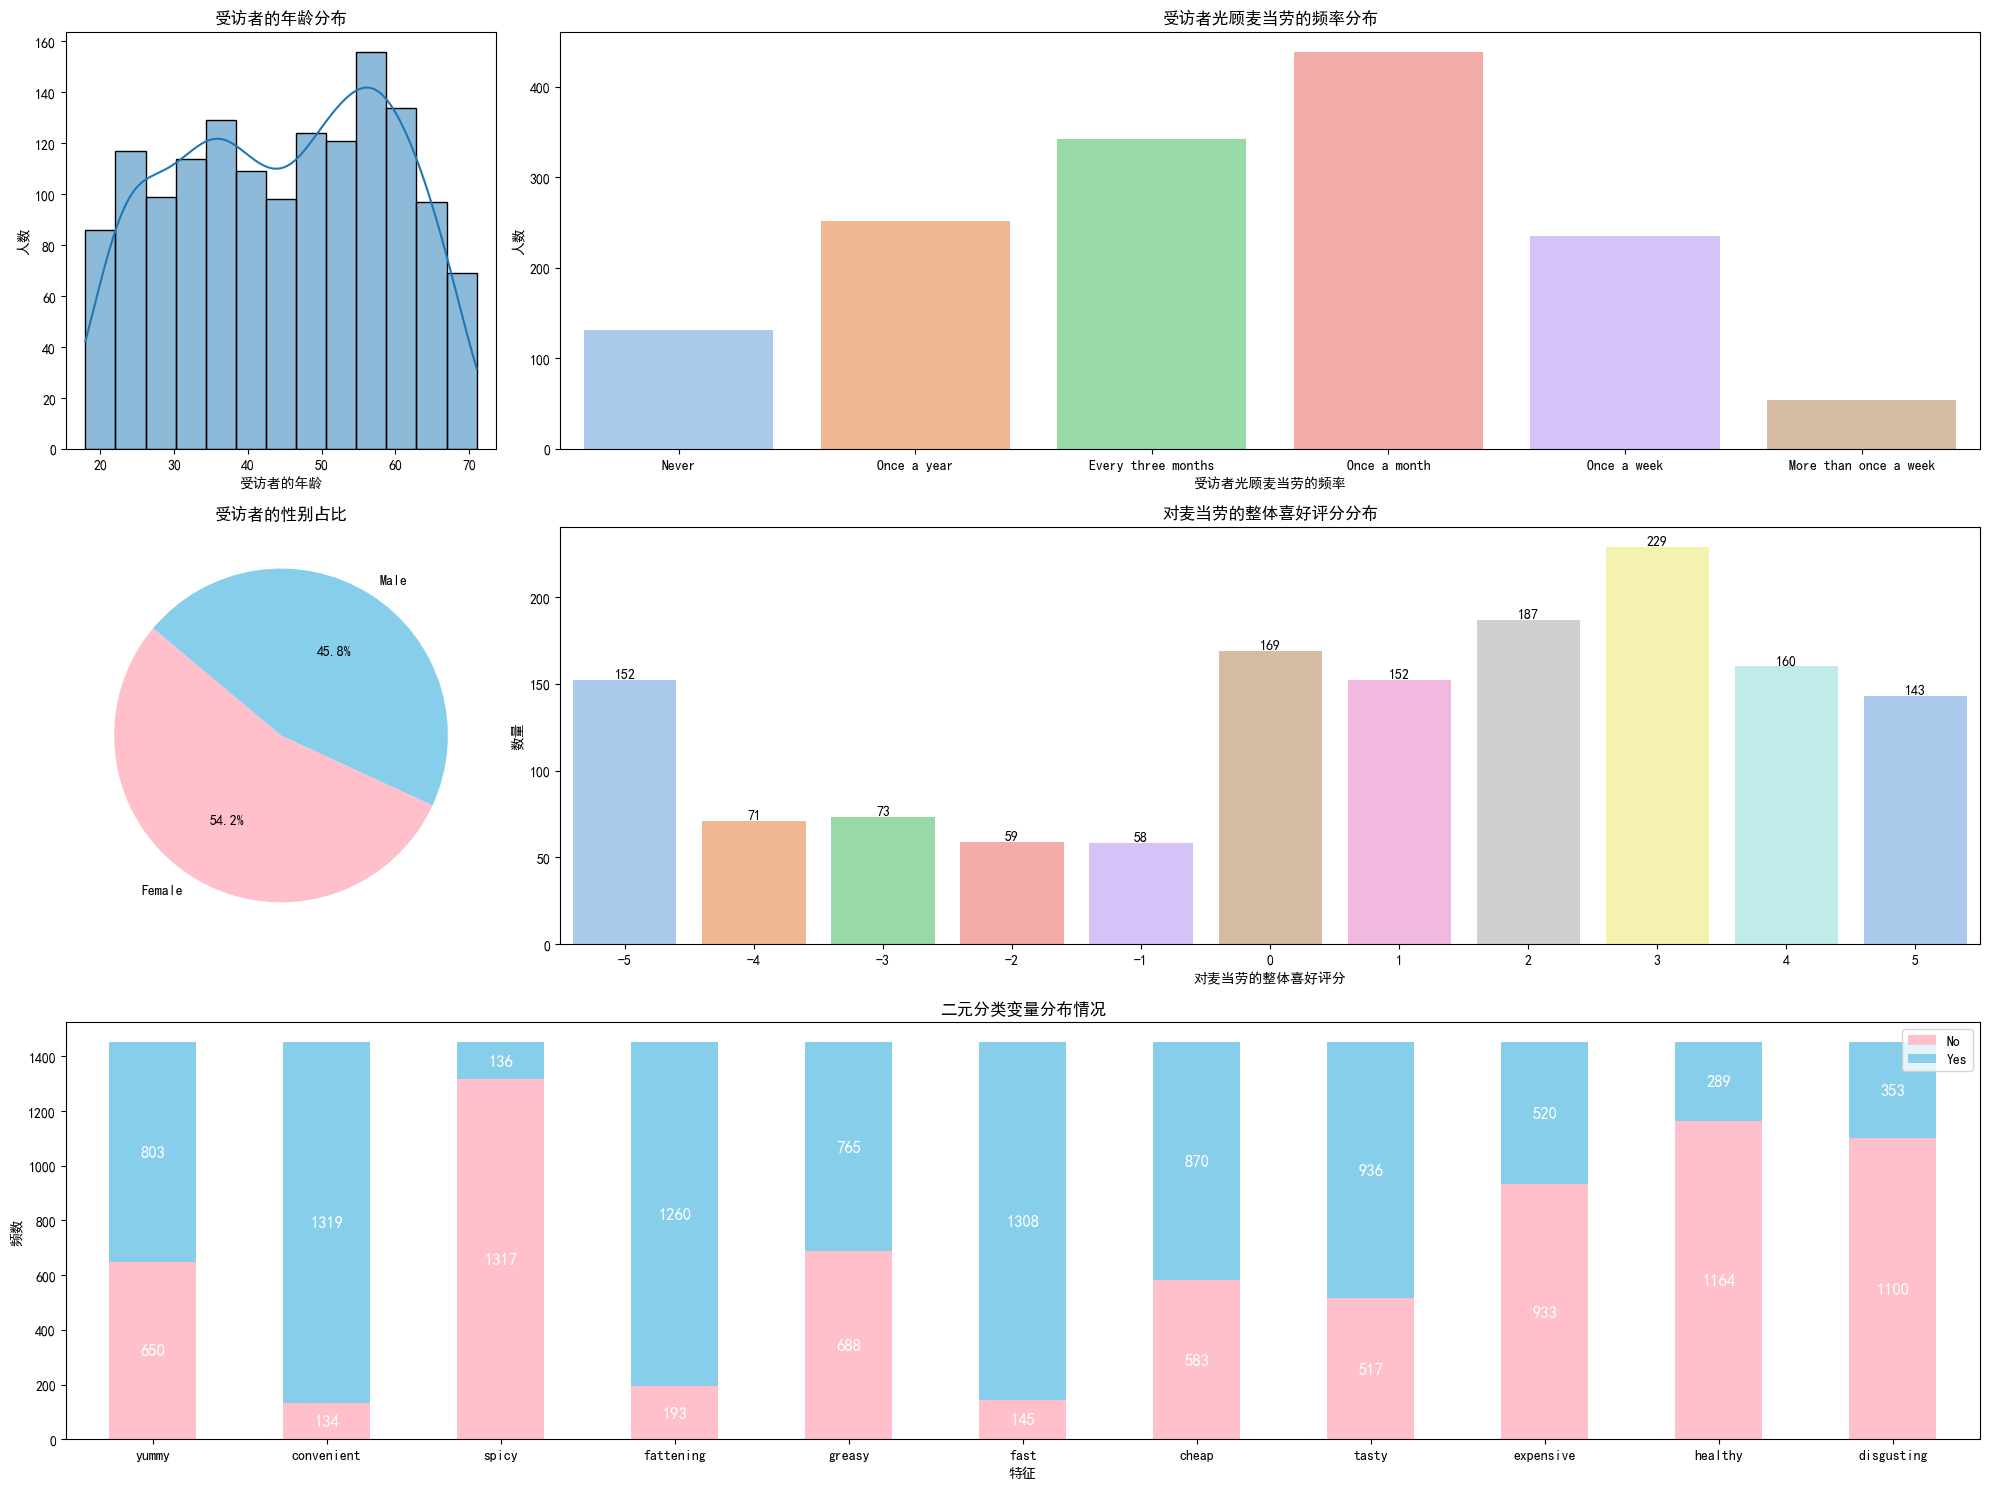

In [3]:
#二、描述性统计分析
data.describe(include='all')
# 定义一个函数，在countplot上添加数量文本,给每个条形顶部添加一个标签，显示该条形的高度（即对应的数值）
def add_count_labels(ax):
    for p in ax.patches:
        height = int(p.get_height())
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom')

VisitFrequency_order = ['Never','Once a year','Every three months','Once a month','Once a week','More than once a week']
#受访者年龄分布
plt.figure(figsize=(20,15))
plt.subplot(3,4,1)
sns.histplot(data['Age'], kde=True)
plt.title('受访者的年龄分布')
plt.xlabel('受访者的年龄')
plt.ylabel('人数')
#受访者光顾麦当劳频率分布
plt.subplot(3, 4, (2, 4))
ax = sns.countplot(x=data['VisitFrequency'], order=VisitFrequency_order, palette='pastel')
plt.title('受访者光顾麦当劳的频率分布')
plt.xlabel('受访者光顾麦当劳的频率')
plt.ylabel('人数')
#性别分布
plt.subplot(3,4,5)
gender_counts = data['Gender'].value_counts()
colors = ['pink', 'skyblue']
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140,colors=colors)
plt.title('受访者的性别占比')
#评分分布
plt.subplot(3,4,(6,8))
ax = sns.countplot(x=data['Like'], palette='pastel')
plt.title('对麦当劳的整体喜好评分分布')
plt.xlabel('对麦当劳的整体喜好评分')
plt.ylabel('数量')
add_count_labels(ax)

plt.subplot(3,4,(9,12))
yes_no_vars = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast','cheap','tasty','expensive','healthy','disgusting']

# 计算每个分类变量的频数
yes_no_counts = data[yes_no_vars].apply(lambda x: x.value_counts())
yes_no_counts = yes_no_counts.transpose()

# 绘制堆叠条形图
bar_plot = yes_no_counts.plot(kind='bar', stacked=True, ax=plt.gca(), color=['pink', 'skyblue'])
plt.title('二元分类变量分布情况')
plt.ylabel('频数')
plt.xlabel('特征')
plt.legend(loc='upper right')
plt.xticks(rotation=0)
# 在每个颜色段上标注商品名称和数量
for i, category in enumerate(yes_no_counts.index):
    y_offset = 0
    for item, count in yes_no_counts.loc[category].items():
        if count > 0:
            bar_plot.text(i, y_offset + count / 2, f'{count}', ha='center', va='center', fontsize=12, color='white',fontweight='bold')
            y_offset += count
                     
plt.tight_layout()
plt.show()

# 将性别和访问频率编码为数值
data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})
frequency_mapping = {
    'More than once a week': 5,
    'Once a week': 4,
    'Once a month': 3,
    'Every three months': 2,
    'Once a year': 1,
    'Never': 0
}
data['VisitFrequency'] = data['VisitFrequency'].map(frequency_mapping)

data = data.replace({'No': 0,'Yes': 1})


#================================================

data_scaled = data.drop('Index',axis=1)
# 对数据进行标准化
features_to_standardize = ['Age', 'VisitFrequency','Like']
scaler = StandardScaler()
data_scaled[features_to_standardize] = scaler.fit_transform(data_scaled[features_to_standardize])

#================================================

In [4]:
# 两步聚类

# 第一个函数 预聚类
def pre_cluster(data, threshold=0.5):
    n_samples = len(data)
    pre_clusters = []
    
    # 定义二元变量和连续变量的索引
    binary_idx = list(range(11)) + [14]  # 0-10列和14列(性别)是二元变量
    continuous_idx = [11, 12, 13]  # Like, Age, VisitFrequency是连续变量
    
    # 初始化第一个预聚类
    current_cluster = {
        'center': data.iloc[0],
        'members': [0],
        'n': 1
    }
    pre_clusters.append(current_cluster)
    
    # 遍历剩余样本进行预聚类
    for i in range(1, n_samples):
        sample = data.iloc[i]
        min_dist = float('inf')
        best_cluster = None
        
        # 计算样本与每个已有预聚类的距离
        for cluster in pre_clusters:
            # 分别计算二元变量和连续变量的距离
            binary_dist = np.sum(sample.iloc[binary_idx] != cluster['center'].iloc[binary_idx]) / len(binary_idx)
            continuous_dist = np.sqrt(np.sum((sample.iloc[continuous_idx] - cluster['center'].iloc[continuous_idx]) ** 2))
            
            # 组合距离：二元变量权重0.6，连续变量权重0.4
            dist = 0.6 * binary_dist + 0.4 * continuous_dist
            
            if dist < min_dist:
                min_dist = dist
                best_cluster = cluster
        
        # 根据距离决定是加入现有类还是创建新类
        if min_dist < threshold:
            best_cluster['members'].append(i)
            best_cluster['n'] += 1
            best_cluster['center'] = data.iloc[best_cluster['members']].mean()
        else:
            new_cluster = {
                'center': sample,
                'members': [i],
                'n': 1
            }
            pre_clusters.append(new_cluster)
    
    return pre_clusters


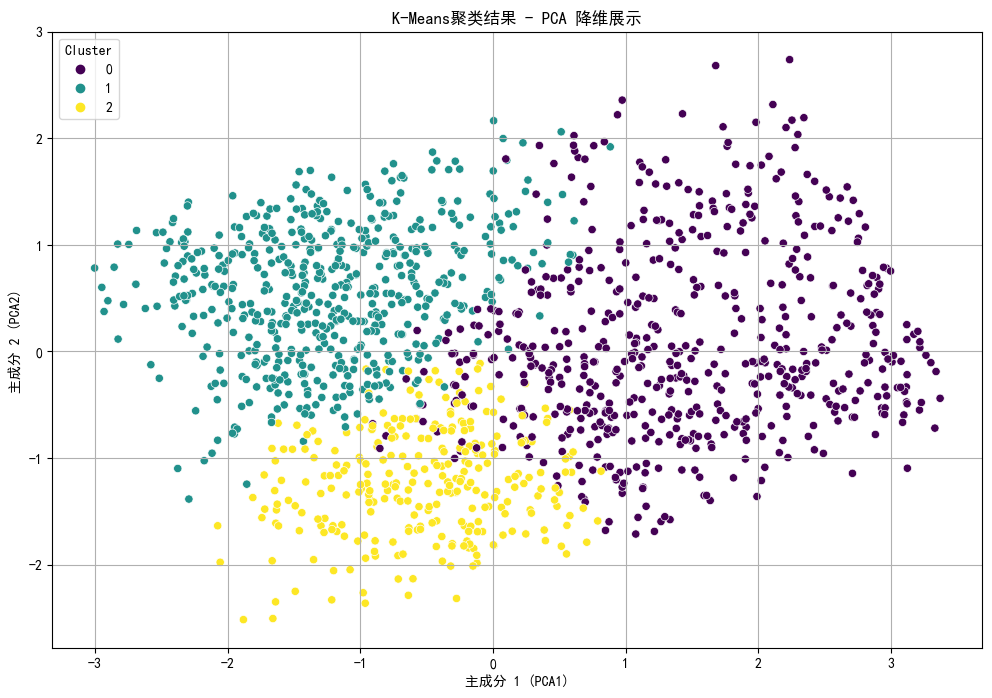

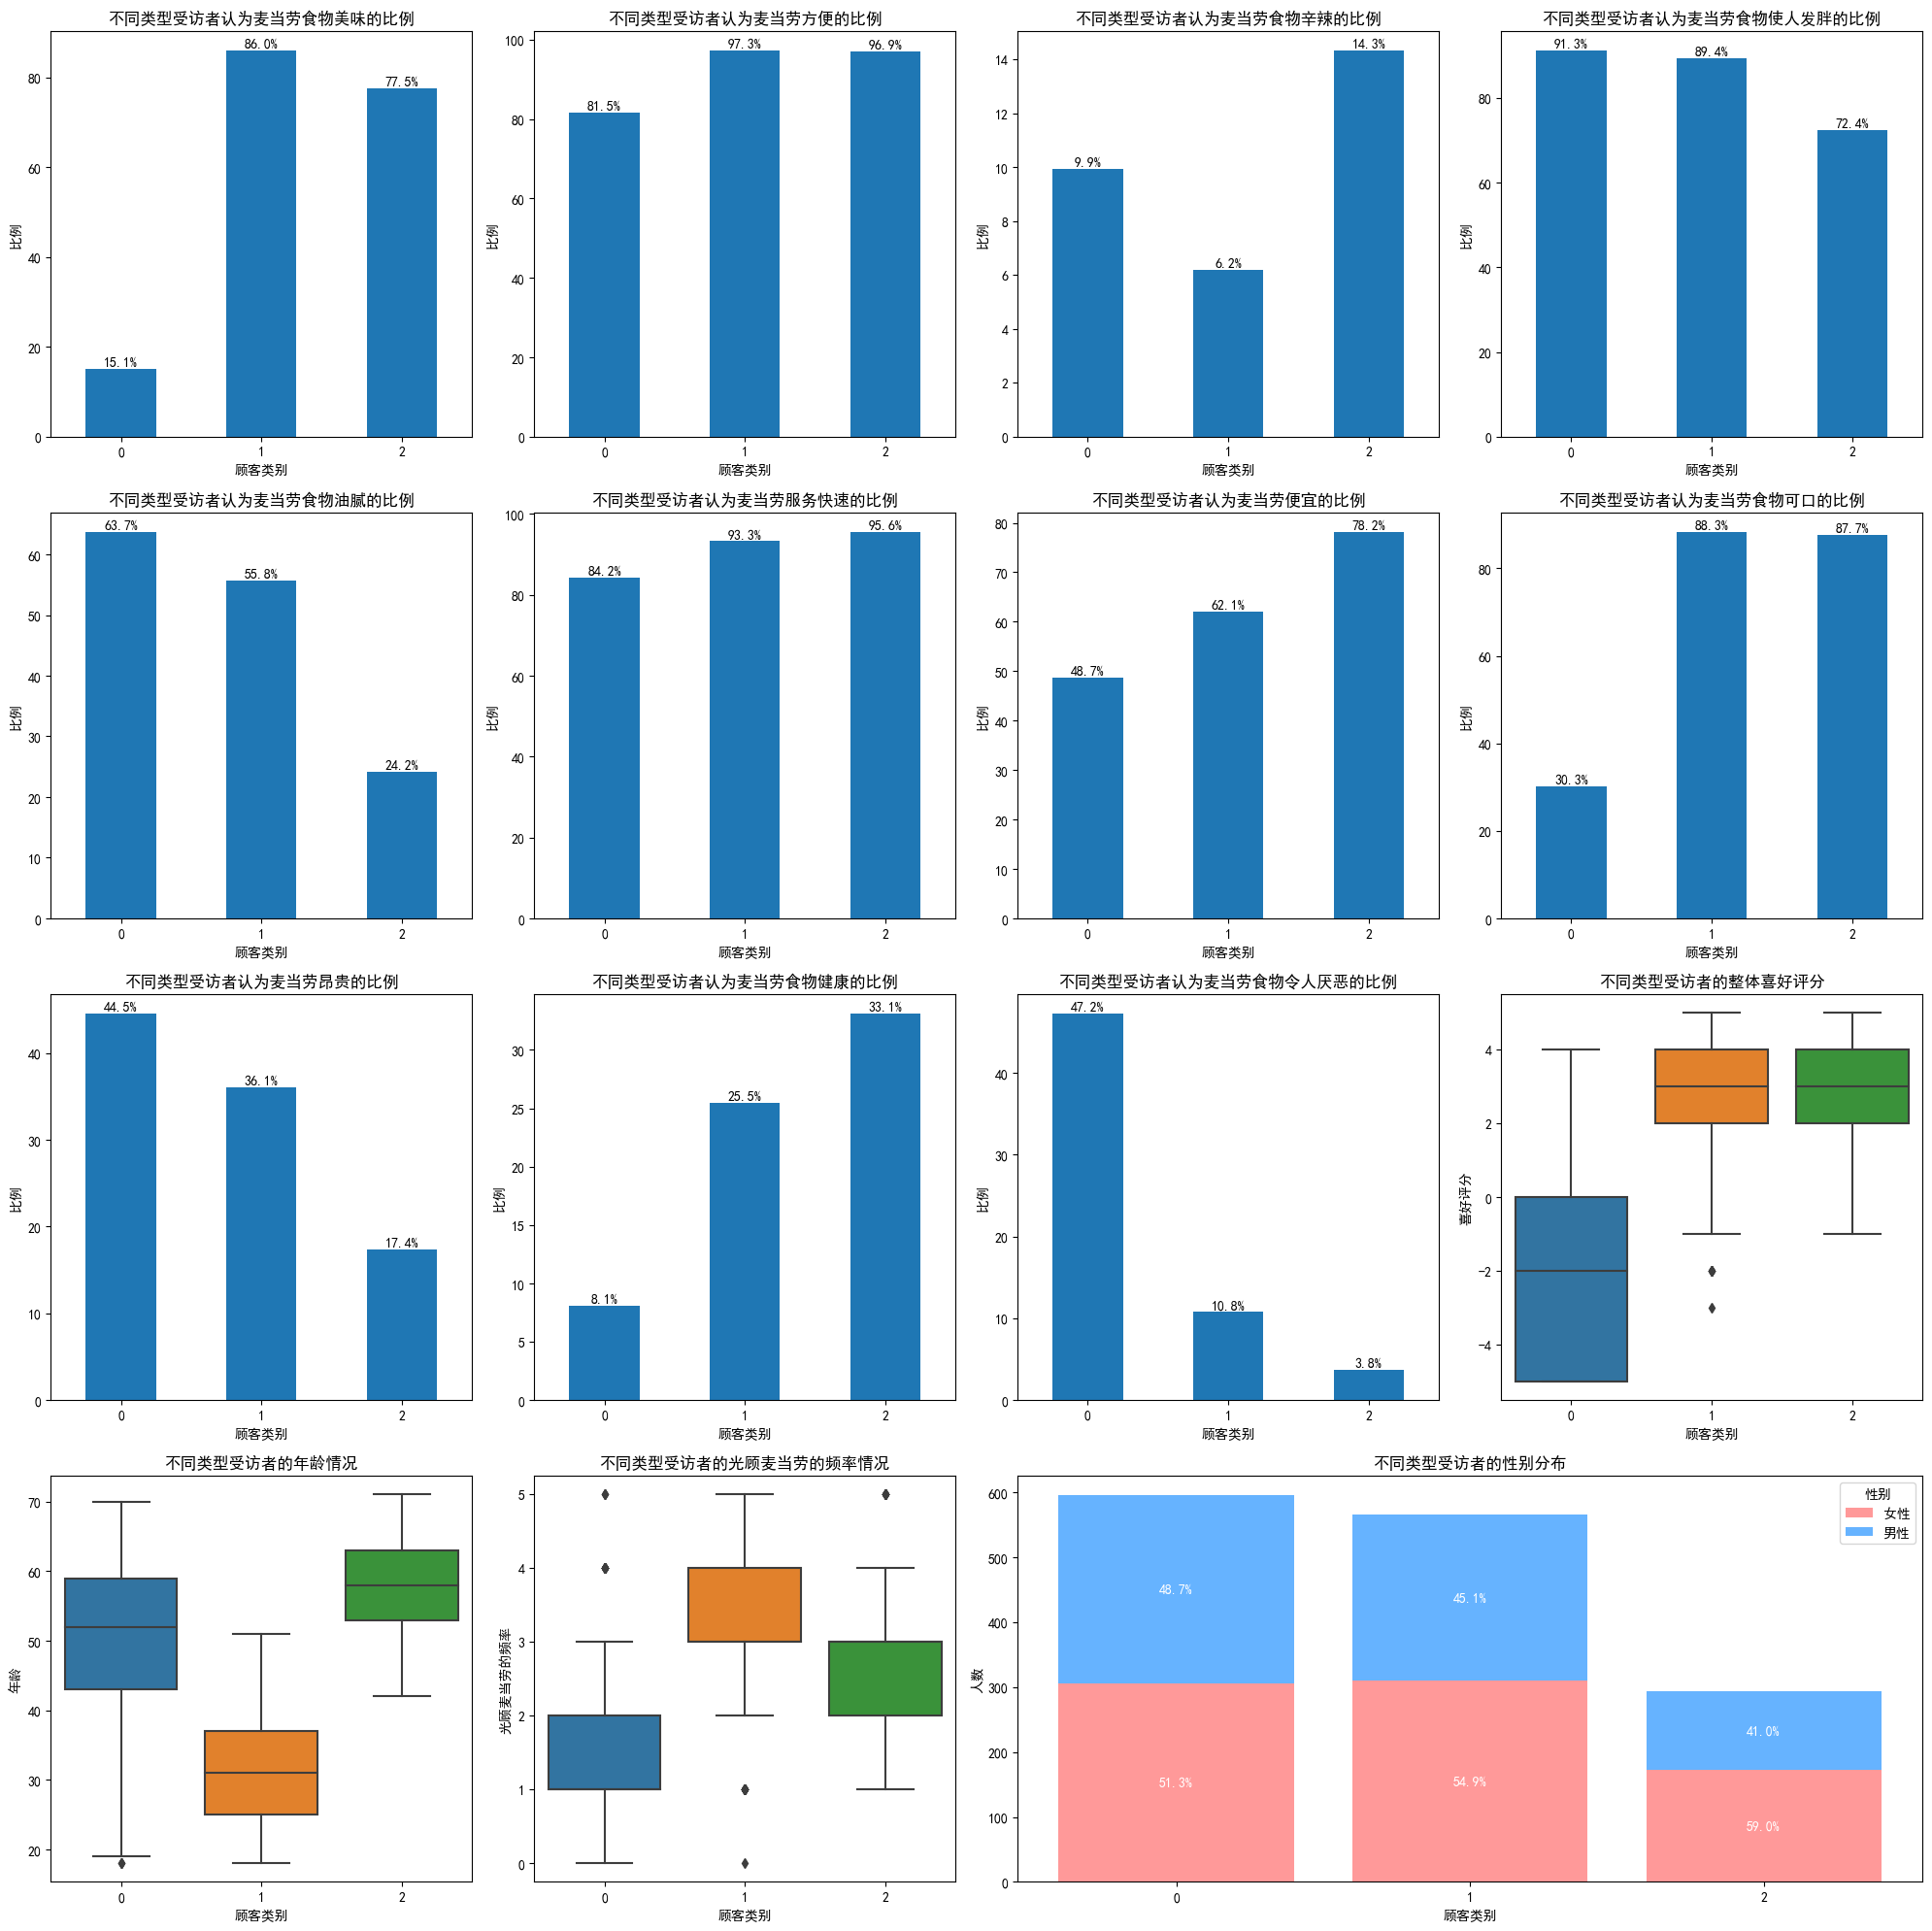

In [5]:
#================================================

# 第二个聚类 层次聚类

def two_step_clustering(data, n_clusters=3):
    # 第一步：预聚类
    pre_clusters = pre_cluster(data_scaled)
    
    # 提取预聚类的中心点
    centers = np.array([cluster['center'] for cluster in pre_clusters])
    
    # 第二步：对预聚类中心进行层次聚类
    hc = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = hc.fit_predict(centers)
    
    # 将聚类标签映射回原始数据点
    final_labels = np.zeros(len(data))
    for i, cluster in enumerate(pre_clusters):
        for member in cluster['members']:
            final_labels[member] = cluster_labels[i]
            
    return final_labels

#================================================
# 执行聚类
labels = two_step_clustering(data_scaled)
data['Cluster'] = labels.astype(int)
#================================================
# PCA降维展示聚类效果
# 使用 PCA 将数据降维到 2 维
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# 将 PCA 结果转为 DataFrame，并添加聚类标签
data_pca_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
data_pca_df['Cluster'] = labels.astype(int)
# 绘制 PCA 降维后的聚类结果
plt.figure(figsize=(12, 8))
sns.scatterplot(x=data_pca_df['PCA1'], y=data_pca_df['PCA2'], hue=data_pca_df['Cluster'], palette='viridis', legend='full')
plt.title(f'K-Means聚类结果 - PCA 降维展示')
plt.xlabel('主成分 1 (PCA1)')
plt.ylabel('主成分 2 (PCA2)')
plt.legend(title='Cluster', loc='upper left')
plt.grid(True)
plt.show()
#================================================
# 绘制不同类之间的情况
# 将分类变量的分布按聚类分组
def plot_bar_chart(feature, title, xlabel, ylabel, position, data, fig):
    feature_and_cluster = pd.crosstab(data['Cluster'], data[feature])
    feature_and_cluster_percent = feature_and_cluster.div(feature_and_cluster.sum(axis=1), axis=0) * 100
    ax = plt.subplot(4, 4, position)
    feature_and_cluster_percent[1].plot(kind='bar', ax=ax)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=0)
    # 添加数据标签
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.figure(figsize=(20, 20))

plot_bar_chart('yummy', '不同类型受访者认为麦当劳食物美味的比例', '顾客类别', '比例', 1, data, plt)

plot_bar_chart('convenient', '不同类型受访者认为麦当劳方便的比例', '顾客类别', '比例', 2, data, plt)

plot_bar_chart('spicy', '不同类型受访者认为麦当劳食物辛辣的比例', '顾客类别', '比例', 3, data, plt)

plot_bar_chart('fattening', '不同类型受访者认为麦当劳食物使人发胖的比例', '顾客类别', '比例', 4, data, plt)

plot_bar_chart('greasy', '不同类型受访者认为麦当劳食物油腻的比例', '顾客类别', '比例', 5, data, plt)

plot_bar_chart('fast', '不同类型受访者认为麦当劳服务快速的比例', '顾客类别', '比例', 6, data, plt)

plot_bar_chart('cheap', '不同类型受访者认为麦当劳便宜的比例', '顾客类别', '比例', 7, data, plt)

plot_bar_chart('tasty', '不同类型受访者认为麦当劳食物可口的比例', '顾客类别', '比例', 8, data, plt)

plot_bar_chart('expensive', '不同类型受访者认为麦当劳昂贵的比例', '顾客类别', '比例', 9, data, plt)

plot_bar_chart('healthy', '不同类型受访者认为麦当劳食物健康的比例', '顾客类别', '比例', 10, data, plt)

plot_bar_chart('disgusting', '不同类型受访者认为麦当劳食物令人厌恶的比例', '顾客类别', '比例', 11, data, plt)

ax12 = plt.subplot(4, 4, 12)
sns.boxplot(x='Cluster', y='Like', data=data, ax=ax12)
plt.title('不同类型受访者的整体喜好评分')
plt.xlabel('顾客类别')
plt.ylabel('喜好评分')

ax13 = plt.subplot(4, 4, 13)
sns.boxplot(x='Cluster', y='Age', data=data, ax=ax13)
plt.title('不同类型受访者的年龄情况')
plt.xlabel('顾客类别')
plt.ylabel('年龄')

ax14 = plt.subplot(4, 4, 14)
sns.boxplot(x='Cluster', y='VisitFrequency', data=data, ax=ax14)
plt.title('不同类型受访者的光顾麦当劳的频率情况')
plt.xlabel('顾客类别')
plt.ylabel('光顾麦当劳的频率')

plt.subplot(4, 4, (15,16))
gender_counts = pd.crosstab(data['Cluster'], data['Gender'])
gender_proportions = pd.crosstab(data['Cluster'], data['Gender'], normalize='index')
plt.bar(gender_counts.index, gender_counts[0], 
        label='女性', color='#ff9999')

# 绘制Male部分
plt.bar(gender_counts.index, gender_counts[1], 
        bottom=gender_counts[0],
        label='男性', color='#66b3ff')

for i in range(len(gender_counts)):
    # 遍历每个性别
    for gender in [0,1]:
        proportion = gender_proportions.iloc[i][gender]
        count = gender_counts.iloc[i][gender]
        if proportion > 0.01:# 避免为0的类型也添加标签
            # 计算标签位置
            if gender == 0:
                y_position = count/2
            else:
                y_position = gender_counts[0].iloc[i] + count/2
            
            # 添加百分比标签
            plt.text(i, y_position, f'{proportion:.1%}', 
                    ha='center', va='center',
                    fontsize=10, color='white', fontweight='bold')

plt.title('不同类型受访者的性别分布')
plt.xlabel('顾客类别')
plt.ylabel('人数')
plt.legend(title='性别')
plt.xticks(range(len(gender_counts)), [f'{i}' for i in range(len(gender_counts))])

plt.tight_layout()
plt.show()

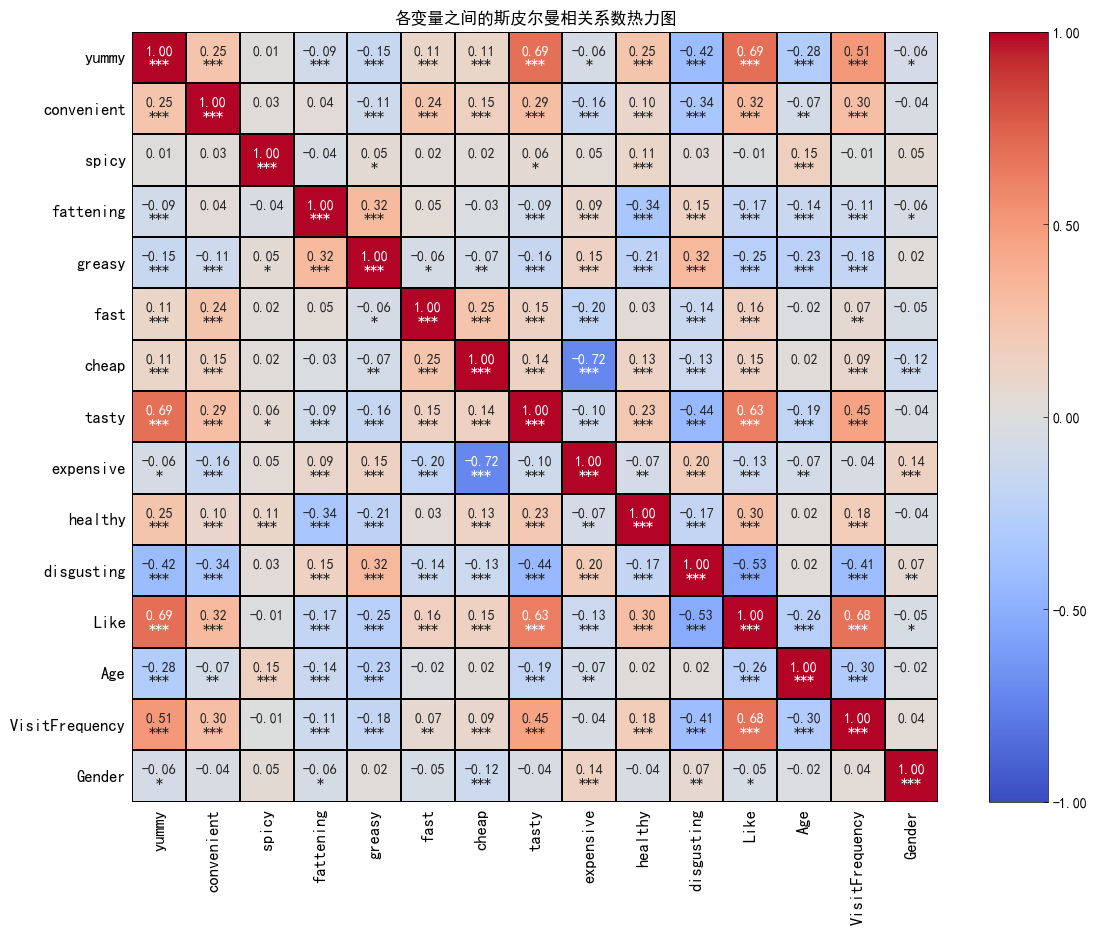

In [6]:
#进行斯皮尔曼相关性分析
def plot_spearmanr(data,features,title,wide,height):
   # 计算斯皮尔曼相关性矩阵和p值矩阵
    spearman_corr_matrix = data[features].corr(method='spearman')
    pvals = data[features].corr(method=lambda x, y: spearmanr(x, y)[1]) - np.eye(len(data[features].columns))

    # 转换 p 值为星号
    def convert_pvalue_to_asterisks(pvalue):
        if pvalue <= 0.001:
            return "***"
        elif pvalue <= 0.01:
            return "**"
        elif pvalue <= 0.05:
            return "*"
        return ""

    # 应用转换函数
    pval_star = pvals.applymap(lambda x: convert_pvalue_to_asterisks(x))

    # 转换成 numpy 类型
    corr_star_annot = pval_star.to_numpy()

    # 定制 labels
    corr_labels = spearman_corr_matrix.to_numpy()
    p_labels = corr_star_annot
    shape = corr_labels.shape

    # 合并 labels
    labels = (np.asarray(["{0:.2f}\n{1}".format(data, p) for data, p in zip(corr_labels.flatten(), p_labels.flatten())])).reshape(shape)

    # 绘制热力图
    fig, ax = plt.subplots(figsize=(height, wide), dpi=100, facecolor="w")
    sns.heatmap(spearman_corr_matrix, annot=labels, fmt='', cmap='coolwarm',
                vmin=-1, vmax=1, annot_kws={"size":10, "fontweight":"bold"},
                linecolor="k", linewidths=.2, cbar_kws={"aspect":13}, ax=ax)

    ax.tick_params(bottom=False, labelbottom=True, labeltop=False,
                left=False, pad=1, labelsize=12)
    ax.yaxis.set_tick_params(labelrotation=0)

    # 自定义 colorbar 标签格式
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(direction="in", width=.5, labelsize=10)
    cbar.set_ticks([-1, -0.5, 0, 0.5, 1])
    cbar.set_ticklabels(["-1.00", "-0.50", "0.00", "0.50", "1.00"])
    cbar.outline.set_visible(True)
    cbar.outline.set_linewidth(.5)

    plt.title(title)
    plt.show()
features = data.drop(['Index','Cluster'],axis=1).columns.tolist()
plot_spearmanr(data,features,'各变量之间的斯皮尔曼相关系数热力图',10,13)